In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer
import pickle
%matplotlib inline

In [100]:
csv_list = ['links', 'movies', 'ratings']

dfs= []
for item in csv_list: 
    dfs.append(pd.read_csv(f'/Users/dinakats/Desktop/SPICED/Recommender/raw_data/ml-latest-small/{item}.csv', engine='python'))

In [101]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['movieId'], how='inner'), dfs)

In [102]:
df_merged.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [168]:
#need to have users as index, movies as columns
uvsm=pd.pivot_table(df_merged, values = 'rating', index = 'userId', columns = 'title' )

In [169]:
uvsm

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [170]:
df_merged[df_merged.userId == 2]

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
8652,318,111161,278.0,"Shawshank Redemption, The (1994)",Crime|Drama,2,3.0,1445714835
9186,333,114694,11381.0,Tommy Boy (1995),Comedy,2,4.0,1445715029
34762,1704,119217,489.0,Good Will Hunting (1997),Drama|Romance,2,4.5,1445715228
55517,3578,172495,98.0,Gladiator (2000),Action|Adventure|Drama,2,4.0,1445714885
72615,6874,266697,24.0,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller,2,4.0,1445714952
76949,8798,369339,1538.0,Collateral (2004),Action|Crime|Drama|Thriller,2,3.5,1445714960
82940,46970,415306,9718.0,Talladega Nights: The Ballad of Ricky Bobby (2...,Action|Comedy,2,4.0,1445715013
83508,48516,407887,1422.0,"Departed, The (2006)",Crime|Drama|Thriller,2,4.0,1445715064
86868,58559,468569,155.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2,4.5,1445715141
87775,60756,838283,12133.0,Step Brothers (2008),Comedy,2,5.0,1445714980


In [171]:
uvsm.loc[2,:]['Warrior (2011)'] #looks like everything is working 

5.0

In [190]:
#need to impute nan
imputer=KNNImputer(n_neighbors = 1)

In [191]:
uvsm_knn = imputer.fit_transform(uvsm)

In [109]:
csm = cosine_similarity(uvsm_knn)
csm_item = cosine_similarity(uvsm_knn.T)

In [110]:
csm[0]

array([1.        , 0.97080095, 0.95660164, 0.96344264, 0.96788275,
       0.97505644, 0.97107012, 0.97418534, 0.9756222 , 0.96602133,
       0.97940979, 0.97554776, 0.9769995 , 0.96697382, 0.97062397,
       0.96756829, 0.97939152, 0.97765425, 0.96239039, 0.97772766,
       0.97015413, 0.95690215, 0.96675992, 0.97312928, 0.97791283,
       0.96099551, 0.97302956, 0.95955466, 0.97853624, 0.97495394,
       0.97443227, 0.97412471, 0.97893765, 0.96790726, 0.97201998,
       0.95675629, 0.9737869 , 0.97064056, 0.97711041, 0.97526085,
       0.9634884 , 0.97902057, 0.97715764, 0.96824183, 0.9818894 ,
       0.97841872, 0.96382967, 0.97769882, 0.97672637, 0.9552281 ,
       0.97555616, 0.97808232, 0.97117329, 0.96260306, 0.96657218,
       0.97633739, 0.97144688, 0.97645463, 0.9699034 , 0.96836898,
       0.97391552, 0.98068883, 0.96825512, 0.97860394, 0.96890204,
       0.97976184, 0.97224801, 0.96845997, 0.97906483, 0.97637378,
       0.96982459, 0.97957433, 0.97339655, 0.97552203, 0.96093

In [151]:
csm_df = pd.DataFrame(csm)


In [152]:
csm_df

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.970801,0.956602,0.963443,0.967883,0.975056,0.971070,0.974185,0.975622,0.966021,...,0.978362,0.975332,0.967107,0.972788,0.970177,0.973301,0.975596,0.970702,0.966625,0.979291
1,0.970801,1.000000,0.958397,0.964992,0.967489,0.969109,0.967198,0.966881,0.968232,0.963964,...,0.970170,0.967973,0.968641,0.969860,0.968787,0.973980,0.968832,0.970041,0.969004,0.972713
2,0.956602,0.958397,1.000000,0.957327,0.958307,0.956807,0.958868,0.955441,0.956213,0.957139,...,0.957161,0.958345,0.958341,0.955949,0.961815,0.959334,0.955876,0.961060,0.959932,0.961761
3,0.963443,0.964992,0.957327,1.000000,0.966892,0.965686,0.970861,0.968385,0.963370,0.968233,...,0.964336,0.968431,0.969620,0.968383,0.969181,0.971632,0.967012,0.965964,0.965875,0.968953
4,0.967883,0.967489,0.958307,0.966892,1.000000,0.967600,0.969382,0.969042,0.965217,0.963799,...,0.966998,0.970055,0.969635,0.969240,0.967016,0.972369,0.967981,0.968577,0.969808,0.969658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.973301,0.973980,0.959334,0.971632,0.972369,0.972465,0.976188,0.977561,0.972221,0.970240,...,0.975329,0.975949,0.979840,0.978260,0.976420,1.000000,0.974867,0.977460,0.974095,0.980878
606,0.975596,0.968832,0.955876,0.967012,0.967981,0.976441,0.973845,0.972452,0.970180,0.968983,...,0.974142,0.973428,0.970056,0.975031,0.971939,0.974867,1.000000,0.971545,0.967401,0.976788
607,0.970702,0.970041,0.961060,0.965964,0.968577,0.968606,0.970867,0.972517,0.967706,0.967378,...,0.972281,0.974174,0.972540,0.972569,0.975097,0.977460,0.971545,1.000000,0.970860,0.975602
608,0.966625,0.969004,0.959932,0.965875,0.969808,0.966823,0.968381,0.970103,0.965709,0.966427,...,0.965779,0.971312,0.971282,0.969407,0.968427,0.974095,0.967401,0.970860,1.000000,0.969666


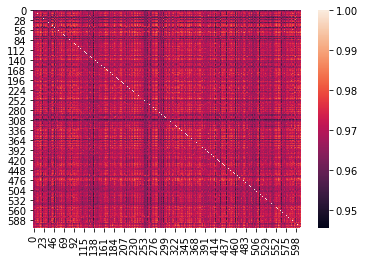

In [153]:
sns.heatmap(csm_df)

In [154]:
# add a new user bob and calculate the cosim 

In [155]:
bob = {'Toy Story (1995)':5 , 'Heat (1995)':3, 'Sabrina (1995)':5, 'Tom and Huck (1995)':2}

In [177]:
#add bob to data frame
uvsm_bob = uvsm.append(bob, ignore_index=True)
uvsm_bob.index = uvsm_bob.index+1

In [178]:
uvsm_bob

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [179]:
#impute knn - for functional version, will need to just use knn for the model, add zeros for not known for bob 
uvsm_bob_knn = uvsm_bob.fillna(2.5)

In [180]:
csm_bob = cosine_similarity(uvsm_bob_knn)

In [181]:
csm_bob = pd.DataFrame(csm_bob, index=uvsm_bob.index, columns=uvsm_bob.index)

In [182]:
csm_bob.loc[610]

1      0.977428
2      0.981953
3      0.980789
4      0.978179
5      0.981418
         ...   
607    0.979935
608    0.978335
609    0.981874
610    1.000000
611    0.981951
Name: 610, Length: 611, dtype: float64

In [183]:
# get top 5 most similar users 
best_user_match = csm_bob.loc[610].sort_values(ascending=False)

In [184]:
best_user_match[1:6].index

Int64Index([279, 434, 247, 331, 560], dtype='int64')

In [185]:
uvsm.loc[best_user_match[1:6].index].mean().sort_values(ascending=False).index[0:5] #one line to get the top ones

Index(['Jungle Book, The (1967)', 'Singin' in the Rain (1952)',
       'Assassination of Jesse James by the Coward Robert Ford, The (2007)',
       'Silver Linings Playbook (2012)', 'Pay It Forward (2000)'],
      dtype='object', name='title')

In [186]:
#item based 
csm_item.shape
    

(9719, 9719)

In [187]:
csm_item = pd.DataFrame(csm_item, index = uvsm.columns, columns = uvsm.columns)

In [188]:
np.amin(csm), min(np.amin(csm_item))

(0.9454785631372667, 0.42833873473073564)

In [141]:
bob

{'Toy Story (1995)': 5,
 'Heat (1995)': 3,
 'Sabrina (1995)': 5,
 'Tom and Huck (1995)': 2}

In [ ]:
def get_item_cosine_rec(original_dict, csm_item):
    